# Gaussian process

In [206]:
import numpy as np
import matplotlib.pyplot as plt

In [207]:
n = 50
X_test = np.linspace(-5, 5, n).reshape(-1, 1)

## Define a kernel function
In this experiment, let's use one of the most common kernels: Radial Basis Function (aka Gaussian kernel or Exponentited Quadratic Kernel)

$$
K(x_1, x_2) = \sigma^2 e^{-\frac{1}{2l^2}(x_1 - x_2)^2}
$$

With the kernel function, we build the covariance matrix of observed datapoints with respect to each other.
Kernel function calculates the distance of the points and gives us back the similarity measure of the data points.
The closer the data points are to each other, the more correlated they are. If the points are correlated, they tend to move together which in turn makes the function smoother.

### Hyperparameters

$\sigma^2$ = vertical height multiplier of the function<br>
$l$ = horizontal length scale, how fast the correlation drops when the distance increases

In [208]:
# This should be refactored to be in vectorized form
# Vertical height multiplier omitted, using value 1 for it
def kernel(x1, x2, l=1):
	K = np.empty((len(x1), len(x2)))
	for i, a in enumerate(x1):
		for j, b in enumerate(x2):
			sqrt_distance = np.linalg.norm([a - b], 2) ** 2
			K[i, j] = np.exp(-0.5 * (1 / (l ** 2)) * sqrt_distance)
	return K

In [209]:
l = 0.5
K_ss = kernel(X_test, X_test, l)

## Cholesky decomposition and function prior

Get the square root of the covariance with Cholesky decomposition.
In some cases, you need to add some jitter/variance to the kernel matrix in order to make Cholesky numerically more stable.
Cholesky decomposition assumes that the input matrix is positive definite matrix.

In [210]:
# With jitter
# L = np.linalg.cholesky(K_ss + 1e-6 * np.eye(n))
L_ss = np.linalg.cholesky(K_ss) 
n_prior = 3
f_prior = np.dot(L_ss, np.random.normal(size=(n, n_prior)))

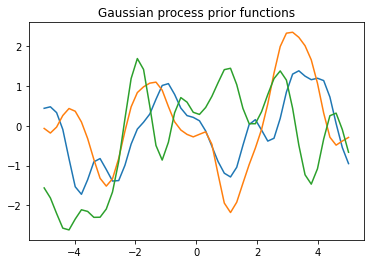

In [211]:
plt.plot(X_test, f_prior)
plt.title('Gaussian process prior functions')
plt.show()

## Adding observations to the prior

In [212]:
X_train = np.arange(-5, 5).reshape(-1,1)

# Let's use sin function for the true values
y_train = np.sin(X_train)


In [213]:
K = kernel(X_train, X_train, l)
L = np.linalg.cholesky(K)
m = np.linalg.solve(L, y_train)
alpha = np.linalg.solve(L.T, m)

In [214]:
# Posterior means at test point values
K_s = kernel(X_train, X_test, l)
mu = np.dot(K_s.T, alpha)

In [215]:
# Posterior covariance matrix
beta = np.linalg.solve(K, K_s)
cov = K_ss - np.dot(K_s.T, beta)

## Sampling from posterior

In [216]:
L_cov = np.linalg.cholesky(cov + 1e-5 * np.eye(n))
n_posterior_sample = 3
f_posterior = mu.reshape(-1, 1) + np.dot(L_cov, np.random.normal(size=(n, n_posterior_sample)))

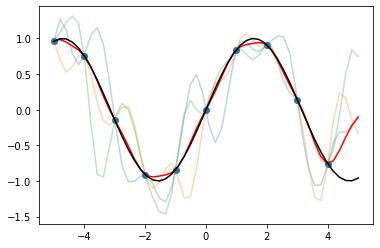

In [217]:
plt.plot(X_test, f_posterior, alpha=0.3)
plt.scatter(X_train, y_train)
plt.plot(X_test, mu, color="r")
plt.plot(X_test, np.sin(X_test), color="black")
plt.show()